# Help Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@3baf5137

This op has the information you need if you know the operation that you want to do but do not know what you need to run it. Let's say, for example, that we want to run a Gaussian on [this image](http://imagej.net/images/abe.tif):

In [2]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/abe.tif")
ij.notebook().display(input)

we now have our image, but what else do we need to have to run our Gaussian? Using the Help Op, we can easily find out:

In [3]:
ij.op().help('gauss')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.gauss.DefaultGaussRA(
		RandomAccessibleInterval out,
		RandomAccessible in,
		double[] sigmas)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.GaussRAISingleSigma(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		OutOfBoundsFactory outOfBounds?)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.DefaultGaussRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] sigmas,
		OutOfBoundsFactory outOfBounds?)

Something of importance to note here: The `?` seen in the op signatures above implies that the associated parameter is optional. There are many reasons that an optional parameter is allowed: some Ops can create their own output but will allow you to pass through your own if you so choose, some Ops can have additional 

Our image is a `RandomAccessibleInterval`, so we are going to want to choose between the second and third choices in that list. Let's use the third choice, so that we can pass through a different `sigma` for each dimension if we want to. 

Note that the first parameter `out` and the `RandomAccessibleInterval` that we are assigning the result of the `Op` to are both optional. This is due to the fact that ImageJ-Ops is smart enough (in such cases) to either create an output and return it once finished or to take an output image as a parameter and populate it, then returning nothing. Since we have to choose one of these two options to get the output, let's not create an output image beforehand and just let the `Op` do the work. 

We are also allowed to pass through an `OutOfBoundsFactory` if we want to, which will change the way the Gaussian deals with the edges of the image, however this is a little complicated for the scope of this tutorial so we will leave it out.

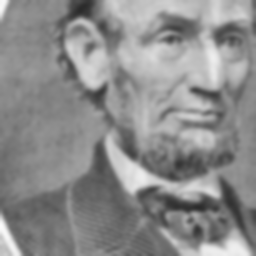

In [4]:
//sigmas for Gaussian
sigmas = [2, 2] as double[]

output = ij.op().filter().gauss(input, sigmas)

ij.notebook().display(output)

If you want to see a list of all of the different `Ops` that ImageJ-Ops has to offer, you can check them out [here](../ImageJ_Ops.ipynb).